## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings

In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns


import tensorflow as tf

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.io import FixedLenFeature
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize

## Loading Data

In [4]:
dataset = pd.read_csv('E:\Others\DL Projects\Project 1\Dataset and Details\Dataset.csv', delimiter=',')
dataset.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [5]:
dataset.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

## EDA

In [6]:
dataset.describe().T

count           mean           std  \
EventId                      250000.0  224999.500000  72168.927986   
DER_mass_MMC                 250000.0     -49.023079    406.345647   
DER_mass_transverse_met_lep  250000.0      49.239819     35.344886   
DER_mass_vis                 250000.0      81.181982     40.828691   
DER_pt_h                     250000.0      57.895962     63.655682   
DER_deltaeta_jet_jet         250000.0    -708.420675    454.480565   
DER_mass_jet_jet             250000.0    -601.237051    657.972302   
DER_prodeta_jet_jet          250000.0    -709.356603    453.019877   
DER_deltar_tau_lep           250000.0       2.373100      0.782911   
DER_pt_tot                   250000.0      18.917332     22.273494   
DER_sum_pt                   250000.0     158.432217    115.706115   
DER_pt_ratio_lep_tau         250000.0       1.437609      0.844743   
DER_met_phi_centrality       250000.0      -0.128305      1.193585   
DER_lep_eta_centrality       250000.0    -708.985189    453.596721   
PRI_tau_pt                   250000.0      38.707419     22.412081   
PRI_tau_eta                  250000.0      -0.010973      1.214079   
PRI_tau_phi                  250000.0      -0.008171      1.816763   
PRI_lep_pt                   250000.0      46.660207     22.064922   
PRI_lep_eta                  250000.0      -0.019507      1.264982   
PRI_lep_phi                  250000.0       0.043543      1.816611   
PRI_met                      250000.0      41.717235     32.894693   
PRI_met_phi                  250000.0      -0.010119      1.812223   
PRI_met_sumet                250000.0     209.797178    126.499506   
PRI_jet_num                  250000.0       0.979176      0.977426   
PRI_jet_leading_pt           250000.0    -348.329567    532.962789   
PRI_jet_leading_eta          250000.0    -399.254314    489.338286   
PRI_jet_leading_phi          250000.0    -399.259788    489.333883   
PRI_jet_subleading_pt        250000.0    -692.381204    479.875496   
PRI_jet_subleading_eta       250000.0    -709.121609    453.384624   
PRI_jet_subleading_phi       250000.0    -709.118631    453.389017   
PRI_jet_all_pt               250000.0      73.064591     98.015662   
Weight                       250000.0       1.646767      1.875103   

                                       min            25%            50%  \
EventId                      100000.000000  162499.750000  224999.500000   
DER_mass_MMC                   -999.000000      78.100750     105.012000   
DER_mass_transverse_met_lep       0.000000      19.241000      46.524000   
DER_mass_vis                      6.329000      59.388750      73.752000   
DER_pt_h                          0.000000      14.068750      38.467500   
DER_deltaeta_jet_jet           -999.000000    -999.000000    -999.000000   
DER_mass_jet_jet               -999.000000    -999.000000    -999.000000   
DER_prodeta_jet_jet            -999.000000    -999.000000    -999.000000   
DER_deltar_tau_lep                0.208000       1.810000       2.491500   
DER_pt_tot                        0.000000       2.841000      12.315500   
DER_sum_pt                       46.104000      77.550000     120.664500   
DER_pt_ratio_lep_tau              0.047000       0.883000       1.280000   
DER_met_phi_centrality           -1.414000      -1.371000      -0.356000   
DER_lep_eta_centrality         -999.000000    -999.000000    -999.000000   
PRI_tau_pt                       20.000000      24.591750      31.804000   
PRI_tau_eta                      -2.499000      -0.925000      -0.023000   
PRI_tau_phi                      -3.142000      -1.575000      -0.033000   
PRI_lep_pt                       26.000000      32.375000      40.516000   
PRI_lep_eta                      -2.505000      -1.014000      -0.045000   
PRI_lep_phi                      -3.142000      -1.522000       0.086000   
PRI_met                           0.109000      21.398000      34.802000   
PRI_met_phi                      -3.142000      -

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [8]:
dataset.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [9]:
dataset['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [10]:
fig,axes=plt.subplots(figsize=(10,8))
print(dataset['Label'].value_counts())
sns.barplot(x = dataset['Label'].value_counts().index, y = dataset['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

b    164333
s     85667
Name: Label, dtype: int64


In [11]:
dataset.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [12]:
# Encoding the target, which is categorical in nature
le = preprocessing.LabelEncoder()
dataset['Label'] = le.fit_transform(dataset['Label'])
dataset.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      1  
1      0  
2      0  
3      0  
4      0  

[5 rows x 33 columns]

In [13]:
#dataset = dataset.drop(['Weight'], axis=1)
dataset[:100]

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0    100000       138.470                       51.655        97.827   
1    100001       160.937                       68.768       103.235   
2    100002      -999.000                      162.172       125.953   
3    100003       143.905                       81.417        80.943   
4    100004       175.864                       16.915       134.805   
..      ...           ...                          ...           ...   
95   100095        98.181                       68.298        77.216   
96   100096       113.750                       52.067        76.262   
97   100097       124.575                       34.558       100.197   
98   100098        77.578                       72.277        58.168   
99   100099       107.350                       20.354        77.755   

    DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0     27.980                 0.910           124.711                2.666   
1     48.146              -999.000          -999.000             -999.000   
2     35.635              -999.000          -999.000             -999.000   
3      0.414              -999.000          -999.000             -999.000   
4     16.405              -999.000          -999.000             -999.000   
..       ...                   ...               ...                  ...   
95     1.170              -999.000          -999.000             -999.000   
96     1.250              -999.000          -999.000             -999.000   
97   161.051                 3.243           324.597               -2.626   
98   153.606                 2.604           370.937               -1.597   
99    89.044                 4.449           564.836               -2.990   

    DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0                3.064      41.928  ...            2              67.435   
1                3.473       2.078  ...            1              46.226   
2                3.148       9.336  ...            1              44.251   
3                3.310       0.414  ...            0            -999.000   
4                3.891      16.405  ...            0            -999.000   
..                 ...         ...  ...          ...                 ...   
95               2.918       1.170  ...            0            -999.000   
96               2.962       1.250  ...            0            -999.000   
97               1.479      61.347  ...            3              97.160   
98               0.988      41.756  ...            2             111.656   
99               2.482      31.871  ...            2              95.352   

    PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                 2.150                0.444                 46.062   
1                 0.725                1.158               -999.000   
2                 2.053               -2.028               -999.000   
3              -999.000             -999.000               -999.000   
4              -999.000             -999.000               -999.000   
..                  ...                  ...                    ...   
95             -999.000             -999.000               -999.000   
96             -999.000             -999.000               -999.000   
97               -1.686                2.858                 42.808   
98               -0.987               -0.035                 92.256   
99               -0.825               -0.201                 38.135   

    PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.240                  -2.475         113.497  0.002653   
1                 -999.000                -999.000          46.226  2.233584   
2                 -999.000                -999.000          44.251  2.347389   
3                 -999.000                -999.000          -0.000  5.446378   
4                 -999.000                -999.0

## Corelation Matrix

In [14]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(17, 230, n=7),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
import plotly as pt
import plotly.graph_objs as go

# these two lines are what allow your code to show up in a notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

corr = dataset.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)
data=[trace]
fig = go.Figure(data = data)
iplot(fig)

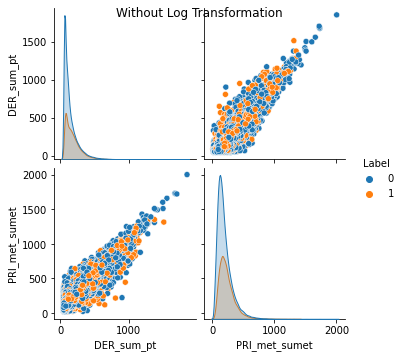

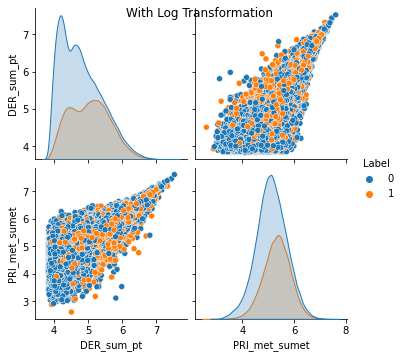

In [16]:
higgs_select=dataset[["DER_sum_pt","PRI_met_sumet","Label"]]
sns.pairplot(higgs_select, hue="Label").fig.suptitle('Without Log Transformation')
plt.show()

x = higgs_select["DER_sum_pt"].apply(np.log)
y = higgs_select["PRI_met_sumet"].apply(np.log)
z= higgs_select["Label"]

d = {'DER_sum_pt': x, 'PRI_met_sumet': y,'Label':z}
higgs_new = pd.DataFrame(d)
sns.pairplot(higgs_new, hue="Label").fig.suptitle('With Log Transformation')
plt.show()

## Box plot

<AxesSubplot:title={'center':'DER_pt_tot'}, xlabel='Label'>

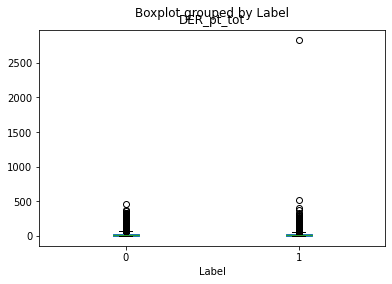

In [17]:
dataset.boxplot(by ='Label', column =["DER_pt_tot"], grid = False)

In [18]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

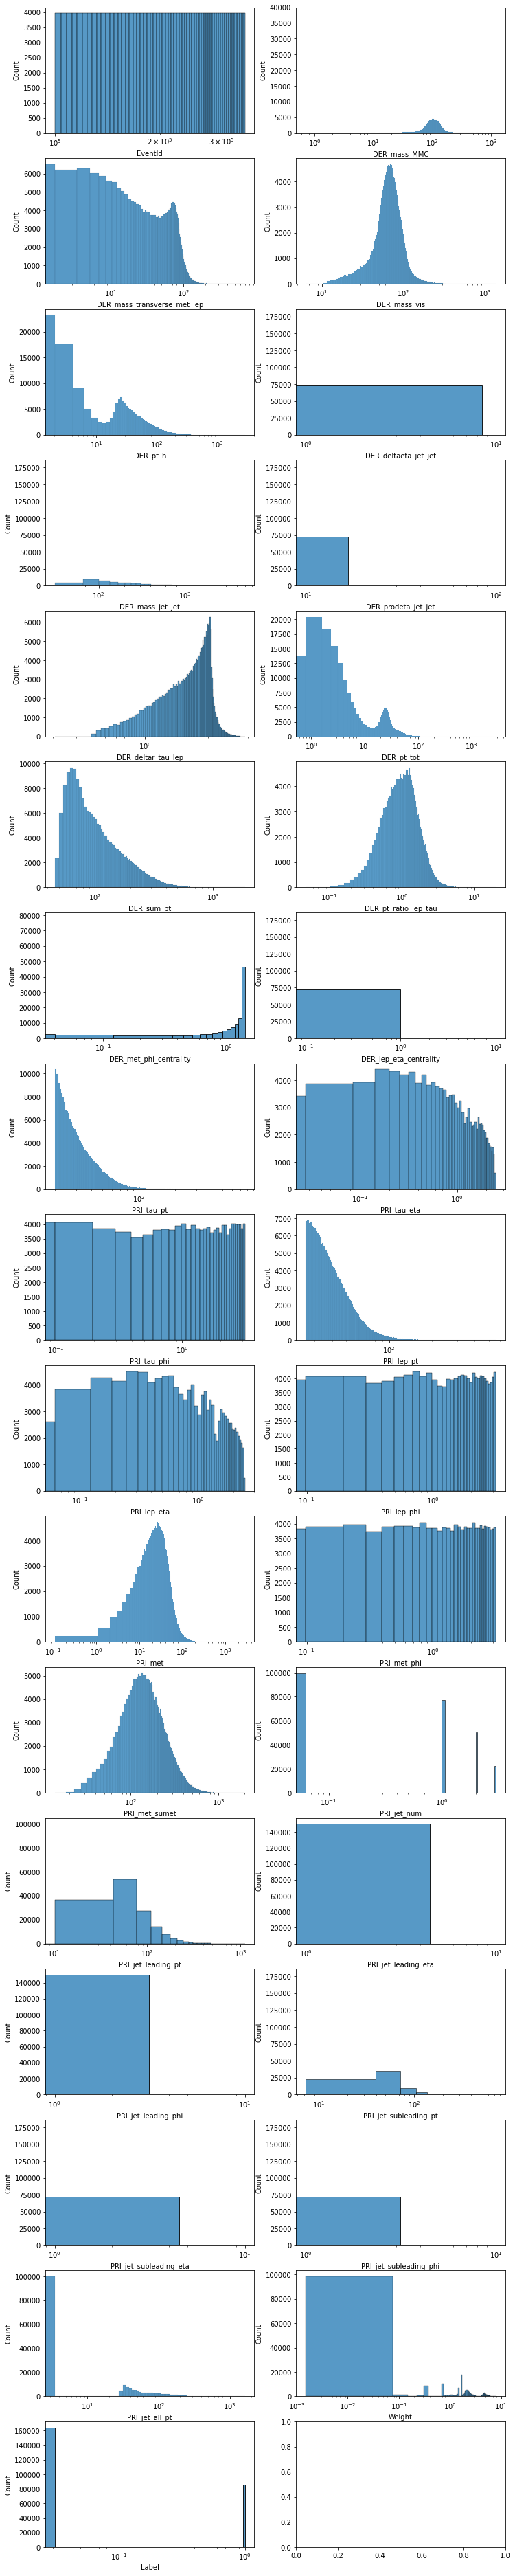

In [19]:
import math
ncols = 2
nrows = math.ceil(len(dataset.columns)/ncols)
fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for v, ax in zip(dataset.columns, axen.ravel()):
    sns.histplot(dataset[v], ax=ax)
    ax.set_xscale('log')

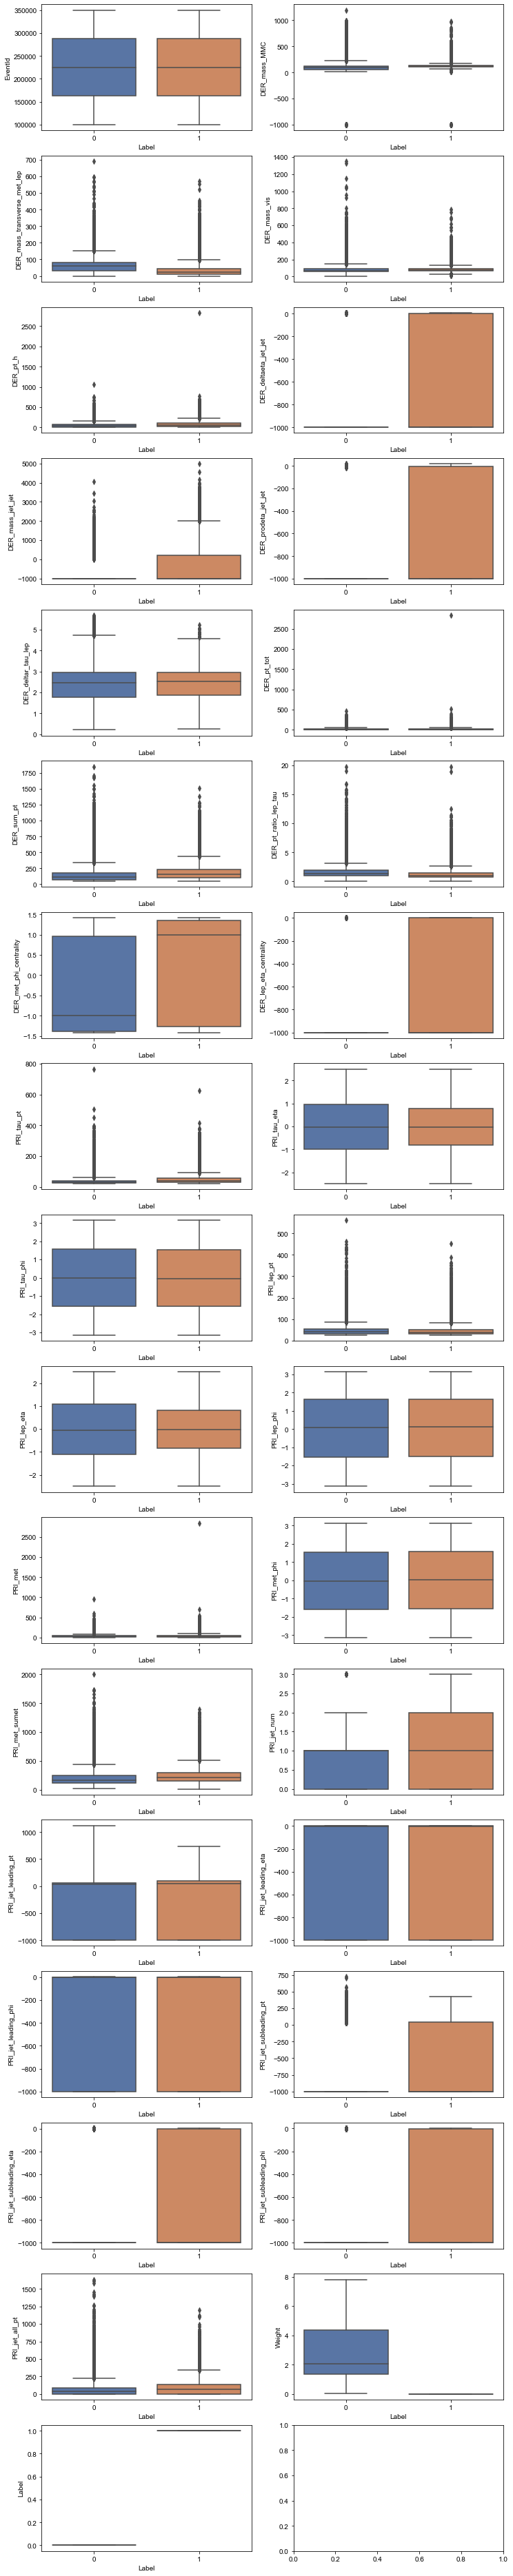

In [20]:
fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for v, ax in zip(dataset.columns, axen.ravel()):
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=dataset[v],
                data=dataset,ax=ax)

In [21]:
sns.set(style='whitegrid')
 
sns.boxplot(x="Label",
                y=dataset[v],
                data=dataset)

<AxesSubplot:xlabel='Label', ylabel='Label'>

In [22]:
dr = remove_outlier(dataset, "DER_deltar_tau_lep")

<AxesSubplot:xlabel='Label', ylabel='DER_deltar_tau_lep'>

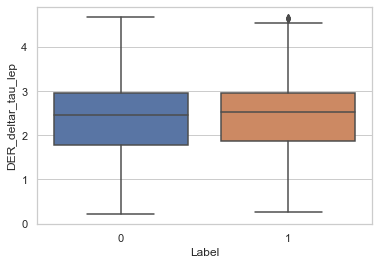

In [23]:
sns.set(style='whitegrid')
sns.boxplot(x="Label",
                y="DER_deltar_tau_lep",
                data=dr)

In [24]:
fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for v, ax in zip(dataset.columns, axen.ravel()):
    dr = remove_outlier(dataset, v)
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=dr[v],
                data=dr,ax=ax)

## Data Preprocessing

In [25]:
dataset.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [26]:
dataset.drop(['PRI_jet_subleading_pt', 'PRI_jet_subleading_eta','PRI_jet_subleading_phi','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet'], axis = 1, inplace = True) 

In [27]:
dataset[dataset==-999.000] = np.NaN

In [28]:
dataset.fillna(dataset.mean(), inplace = True)

In [29]:
dataset

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        100000    138.470000                       51.655        97.827   
1        100001    160.937000                       68.768       103.235   
2        100002    121.858528                      162.172       125.953   
3        100003    143.905000                       81.417        80.943   
4        100004    175.864000                       16.915       134.805   
...         ...           ...                          ...           ...   
249995   349995    121.858528                       71.989        36.548   
249996   349996    121.858528                       58.179        68.083   
249997   349997    105.457000                       60.526        75.839   
249998   349998     94.951000                       19.362        68.812   
249999   349999    121.858528                       72.756        70.831   

        DER_pt_h  DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  \
0         27.980               3.064      41.928     197.760   
1         48.146               3.473       2.078     125.157   
2         35.635               3.148       9.336     197.814   
3          0.414               3.310       0.414      75.968   
4         16.405               3.891      16.405      57.983   
...          ...                 ...         ...         ...   
249995     5.042               1.392       5.042      55.892   
249996    22.439               2.585      22.439      50.618   
249997    39.757               2.390      22.183     120.462   
249998    13.504               3.365      13.504      55.859   
249999     7.479               2.025       7.479      83.240   

        DER_pt_ratio_lep_tau  DER_met_phi_centrality  ...  PRI_met  \
0                      1.582                   1.396  ...   16.824   
1                      0.879                   1.414  ...   44.704   
2                      3.776                   1.414  ...   54.283   
3                      2.354                  -1.285  ...   31.082   
4                      1.056                  -1.385  ...    2.723   
...                      ...                     ...  ...      ...   
249995                 1.258                  -1.414  ...   46.520   
249996                 1.162                  -1.345  ...   46.737   
249997                 1.202                   0.529  ...   23.419   
249998                 0.999                   1.414  ...   12.150   
249999                 0.936                  -1.411  ...   40.729   

        PRI_met_phi  PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  \
0            -0.277        258.733            2           67.435000   
1            -1.916        164.546            1           46.226000   
2            -2.186        260.414            1           44.251000   
3             0.060         86.062            0           84.822105   
4            -0.871         53.131            0           84.822105   
...             ...            ...          ...                 ...   
249995        2.859        144.665            0           84.822105   
249996       -0.867         80.408            0           84.822105   
249997       -2.890        198.907            1           41.992000   
249998        0.811        112.718            0           84.822105   
249999       -1.596         99.405            0           84.822105   

        PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_all_pt    Weight  \
0                  2.150000             0.444000         113.497  0.002653   
1                  0.725000             1.158000          46.226  2.233584   
2                  2.053000            -2.028000          44.251  2.347389   
3                 -0.003275            -0.012393          -0.000  5.446378   
4                 -0.003275            -0.012393           0.000  6.245333   
...                     ...                  ...             ...       ...   
249995            -0.003275            -0.012393           0.000  4.505083   
249996  

In [30]:
dataset.drop(['PRI_met_sumet','PRI_jet_all_pt','EventId'],axis = 1, inplace = True)

In [62]:
y_train = dataset['Label'].values
x_train = dataset.drop(['Label'], axis=1)

In [63]:
type(y_train)

numpy.ndarray

In [32]:
import plotly as pt
import plotly.graph_objs as go

# these two lines are what allow your code to show up in a notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

corr = x_train.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)
data=[trace]
fig = go.Figure(data = data)
iplot(fig)

In [65]:
x_train = normalize(x_train)

In [66]:
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12)

for train,test in splitter.split(x_train,y_train):     #this will splits the index
    X_train_SS = x_train[train]
    y_train_SS = y_train[train]
    X_test_SS = x_train[test]
    y_test_SS = y_train[test]

In [67]:
# reshape for rnn
X_train_SS = np.reshape(X_train_SS, (X_train_SS.shape[0],X_train_SS.shape[1],1))
X_test_SS = np.reshape(X_test_SS, (X_test_SS.shape[0],X_test_SS.shape[1],1))

In [ ]:
test_df_nor = normalize(test_df)

In [34]:
#PRI_met_sumet
#DER_pt_tot

#DER_sum_pt
#PRI_jet_all_pt



In [35]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(x_train), columns = x_train.columns)
df = pd.DataFrame(df_scaled)

In [36]:
df

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0           0.314911                     0.068332      0.407680 -0.469966   
1           0.740827                     0.552505      0.540136 -0.153167   
2           0.000000                     3.195156      1.096560 -0.349710   
3           0.417944                     0.910379     -0.005853 -0.903016   
4           1.023804                    -0.914556      1.313369 -0.651804   
...              ...                          ...           ...       ...   
249995      0.000000                     0.643636     -1.093204 -0.830312   
249996      0.000000                     0.252913     -0.320829 -0.557013   
249997     -0.310931                     0.319316     -0.130864 -0.284955   
249998     -0.510097                    -0.845324     -0.302973 -0.697378   
249999      0.000000                     0.665336     -0.253523 -0.792028   

        DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
0                 0.882478    1.033099    0.339894              0.170929   
1                 1.404888   -0.756027   -0.287584             -0.661279   
2                 0.989770   -0.430168    0.340361              2.768174   
3                 1.196690   -0.830735   -0.712705              1.084818   
4                 1.938794   -0.112795   -0.868143             -0.451747   
...                    ...         ...         ...                   ...   
249995           -1.253146   -0.622954   -0.886214             -0.212621   
249996            0.270657    0.158111   -0.931795             -0.326265   
249997            0.021586    0.146617   -0.328162             -0.278913   
249998            1.266941   -0.243040   -0.886500             -0.519223   
249999           -0.444623   -0.513541   -0.649856             -0.593802   

        DER_met_phi_centrality  DER_lep_eta_centrality  ...  PRI_lep_pt  \
0                     1.277084               -1.202698  ...    0.225054   
1                     1.292164                0.000000  ...   -0.441526   
2                     1.292164                0.000000  ...    3.387682   
3                    -0.969095                0.000000  ...    0.301873   
4                    -1.052877                0.000000  ...   -0.765298   
...                        ...                     ...  ...         ...   
249995               -1.077173                0.000000  ...   -0.703526   
249996               -1.019364                0.000000  ...   -0.881863   
249997                0.550699                0.000000  ...   -0.173407   
249998                1.292164                0.000000  ...   -0.849550   
249999               -1.074660                0.000000  ...   -0.291151   

        PRI_lep_eta  PRI_lep_phi   PRI_met  PRI_met_phi  PRI_jet_num  \
0          1.812288    -1.352820 -0.756757    -0.147267     1.044402   
1          0.411475     0.032730  0.090798    -1.051683     0.021305   
2         -0.737951     0.555132  0.382001    -1.200672     0.021305   
3         -0.397234    -1.730447 -0.323312     0.038692    -1.001792   
4          0.646261     0.839728 -1.185429    -0.475042    -1.001792   
...             ...          ...       ...          ...          ...   
249995    -0.735579     0.185212  0.146005     1.583208    -1.001792   
249996     0.258903     0.549627  0.152601    -0.472835    -1.001792   
249997     0.316612     0.444486 -0.556268    -1.589146     0.021305   
249998    -0.675499    -0.186910 -0.898847     0.453102    -1.001792   
249999     1.193306     0.326684 -0.030042    -0.875104    -1.001792   

        PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi    Weight  
0                -0.369921         1.557298e+00         3.248244e-01 -0.876814  
1                -0.821154         5.267049e-01         8.329932e-01  0.312953  
2                -0.863173         1.487145e+00        -1.434550e+00  0.373645  
3                 0.000000         1.003673e-17         1.111175e-17  2.026352  

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca

0         1         2         3         4         5         6   \
0       0.468516  0.460399 -0.965962  2.407295 -1.623803 -1.106158 -0.917700   
1      -0.798670  0.525235 -1.459205  1.550356 -0.069048 -1.260511  1.624882   
2      -0.164828  4.120257  2.167060 -0.122368 -1.881571  0.525163  1.267707   
3      -2.577964  1.563859  1.249269 -1.150974  0.349225 -0.718724 -1.030092   
4      -2.942916  1.136600 -1.314089 -0.824816  0.513507  0.141966  1.494075   
...          ...       ...       ...       ...       ...       ...       ...   
249995 -1.783783 -0.784168  1.625660 -0.748115  1.419072  1.013313  0.132650   
249996 -1.673732 -0.432599  0.466229 -0.734824  0.789855  0.171969 -0.726339   
249997 -0.422632 -0.623574 -0.410337  0.586746 -0.724784 -0.710957  1.907183   
249998 -1.470892 -1.257965 -0.915318 -1.616932 -0.912568  0.195170 -1.401745   
249999 -1.342585 -0.287476  0.247041  1.613511  1.526069 -0.125271 -0.706675   

              7         8         9   ...        13        14        15  \
0       1.491183 -0.875433  0.050168  ... -0.492817 -0.056248  0.273239   
1      -0.054979  0.040064  0.057561  ... -0.563112 -0.446376  0.321056   
2      -0.645647 -1.683698  0.876824  ... -1.472795 -0.067653  1.479721   
3      -0.494631 -0.459904 -0.497808  ... -0.932263 -0.396175 -0.355818   
4       0.016191 -0.412082 -0.265274  ... -0.182357 -1.110538 -0.949989   
...          ...       ...       ...  ...       ...       ...       ...   
249995 -0.116169 -0.125505 -0.461293  ...  0.286504 -0.579001 -0.056252   
249996  0.346342 -0.234156  0.851449  ...  0.914154  0.567826  0.014270   
249997  0.243658 -1.158231  0.857654  ... -1.086252  0.241930  0.590941   
249998 -0.242822 -0.727623 -0.164117  ...  0.775135 -0.065891  0.873396   
249999 -0.040217  0.541965  0.305258  ...  0.633386  0.482523  0.258620   

              16        17        18        19        20        21        22  
0       0.621465 -0.900091 -0.194011 -0.053863 -0.219031  0.117328 -0.135957  
1      -0.902900 -0.852545  0.518547 -0.186594 -0.206274 -0.269243  0.129870  
2      -0.247275 -1.483594  1.206542 -0.073020 -0.566319  0.264830  0.088417  
3       0.731379 -0.340930  0.180937 -0.612276 -0.096795 -0.092667 -0.022324  
4       1.884760  0.299787  0.209963  0.139188  0.127873 -0.401371 -0.032166  
...          ...       ...       ...       ...       ...       ...       ...  
249995 -0.220904  0.495985 -0.900982 -0.128733 -0.080605  0.116733 -0.010478  
249996  1.102868  0.236201 -0.245331  0.021004  0.119547 -0.126855 -0.029678  
249997  0.283319 -0.269076 -0.015402  0.152134  0.030773 -0.136644  0.111082  
249998  0.778134 -0.848829  0.255548 -0.014774 -0.149814  0.003235 -0.057129  
249999 -0.162030  0.097368 -0.463160  0.056859 -0.117835  0.087234 -0.020877  

[250000 rows x 23 columns]

In [38]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [49]:
pca_15 = PCA(n_components=15, random_state = 2020)
principalComponents_15 = pca_15.fit_transform(df)
print('Explained variation by 15 principal components: {}'.format(sum(pca_15.explained_variance_ratio_)*100))

Explained variation by 15 principal components: 92.36467635055159


In [50]:

principal_cols = ['Principal component '+str(i) for i in range(principalComponents_15.shape[1])]
pca_df = pd.DataFrame(data = principalComponents_15,columns=principal_cols)
pca_df.head()

Principal component 0  Principal component 1  Principal component 2  \
0               0.468516               0.460399              -0.965962   
1              -0.798670               0.525235              -1.459205   
2              -0.164828               4.120257               2.167060   
3              -2.577964               1.563859               1.249269   
4              -2.942916               1.136600              -1.314089   

   Principal component 3  Principal component 4  Principal component 5  \
0               2.407295              -1.623803              -1.106158   
1               1.550356              -0.069048              -1.260511   
2              -0.122368              -1.881571               0.525163   
3              -1.150974               0.349225              -0.718724   
4              -0.824816               0.513507               0.141966   

   Principal component 6  Principal component 7  Principal component 8  \
0              -0.917700               1.491183              -0.875433   
1               1.624882              -0.054979               0.040064   
2               1.267707              -0.645647              -1.683698   
3              -1.030092              -0.494631              -0.459904   
4               1.494075               0.016191              -0.412082   

   Principal component 9  Principal component 10  Principal component 11  \
0               0.050168                0.416942               -0.119609   
1               0.057561                0.156125                0.864772   
2               0.876824               -0.786705               -1.007513   
3              -0.497808                0.565295                0.626530   
4              -0.265274               -0.083042                1.461494   

   Principal component 12  Principal component 13  Principal component 14  
0                0.035834               -0.492817               -0.056248  
1               -1.294143               -0.563112               -0.446376  
2               -1.292110               -1.472795               -0.067653  
3                0.221086               -0.932263               -0.396175  
4                1.369619               -0.182357               -1.110538

## Building LSTM Model

In [68]:
def build_Lstm_model(train_x,train_y,test_x,test_y):
    inp = Input(shape=(train_x.shape[1],train_x.shape[2]))
    rnn_1st_model = LSTM(units=60, return_sequences=True,recurrent_dropout=0.1)(inp)
    rnn_2nd_model = LSTM(units=60,recurrent_dropout=0.1)(rnn_1st_model)
    dense_layer = Dense(128)(rnn_2nd_model)
    drop_out = Dropout(0.2)(dense_layer)
    output = Dense(1, activation= LeakyReLU(alpha=0.1),name="class")(drop_out)
    model = Model(inp, output)
    callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
                 EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_model_LSTM.h5', monitor='val_loss', save_best_only=True)]
    model.summary()
    model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),
                        tf.keras.losses.MeanSquaredLogarithmicError()], optimizer="adam")
    history = model.fit(train_x, train_y, 
          epochs = 20, 
          batch_size = 128, 
          validation_data=(test_x,  test_y), 
          callbacks=callbacks)
    return history,model

In [69]:
def plot_Loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [70]:
def Save_Result_To_Csv(model,model_name,csv_file):
    test_pre = np.reshape(test_df_nor, (test_df_nor.shape[0],test_df_nor.shape[1],1))
    model.load_weights(model_name)
    prediction = model.predict(test_pre)
    prediction =  np.where(prediction > 0.5, 1, 0)
    prediction = pd.Series(prediction[:,0])
    sub = pd.read_csv('../input/higgs-boson/random_submission.zip')
    test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":prediction})
    test_predict['Class'] = test_predict['Class'].replace(1,'s')
    test_predict['Class'] = test_predict['Class'].replace(0,'b')
    test_predict.to_csv(csv_file,index=False)

In [73]:
history_LSTM,Lstm_model = build_Lstm_model(X_train_SS,y_train_SS,X_test_SS,y_test_SS)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 23, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 23, 60)            14880     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
class (Dense)                (None, 1)                 129       
Total params: 51,857
Trainable params: 51,857
Non-trainable params: 0
_______________________________________________________

In [75]:
plot_Loss(history_LSTM)

In [77]:
Lstm_model.save("LSTM_Higgs.h5")